In [9]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import ttest_1samp, shapiro, normaltest, jarque_bera, boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()
sns.set_context("paper")

In [3]:
symbol = "EURUSD=X"

futuro = yf.Ticker(symbol)
datos_historicos = futuro.history(start="2022-01-01", end="2023-06-30")
datos_historicos.index = pd.to_datetime(datos_historicos.index)

datos_historicos.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00+00:00,1.137385,1.137592,1.128541,1.137346,0,0.0,0.0
2022-01-04 00:00:00+00:00,1.130199,1.132300,1.127345,1.130224,0,0.0,0.0
2022-01-05 00:00:00+00:00,1.128541,1.134559,1.127764,1.128363,0,0.0,0.0
2022-01-06 00:00:00+00:00,1.131222,1.133067,1.128554,1.131350,0,0.0,0.0
2022-01-07 00:00:00+00:00,1.129586,1.135976,1.129050,1.129688,0,0.0,0.0


In [32]:
datos_historicos.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,389.000000,389.000000,389.000000,389.000000,389.0,389.0,389.0
mean,1.062758,1.066919,1.058422,1.062760,0.0,0.0,0.0
std,0.043592,0.042883,0.044043,0.043595,0.0,0.0,0.0
min,0.959619,0.967006,0.954016,0.959619,0.0,0.0,0.0
25%,1.032855,1.039415,1.029230,1.032855,0.0,0.0,0.0
50%,1.069141,1.073307,1.065235,1.069141,0.0,0.0,0.0
75%,1.091584,1.094523,1.088554,1.091584,0.0,0.0,0.0
max,1.145659,1.149425,1.143641,1.145712,0.0,0.0,0.0


In [33]:
datos_historicos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2022-01-03 00:00:00+00:00 to 2023-06-29 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          389 non-null    float64
 1   High          389 non-null    float64
 2   Low           389 non-null    float64
 3   Close         389 non-null    float64
 4   Volume        389 non-null    int64  
 5   Dividends     389 non-null    float64
 6   Stock Splits  389 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.3 KB


In [37]:
missing_values = datos_historicos.isnull().sum()
print(missing_values)

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


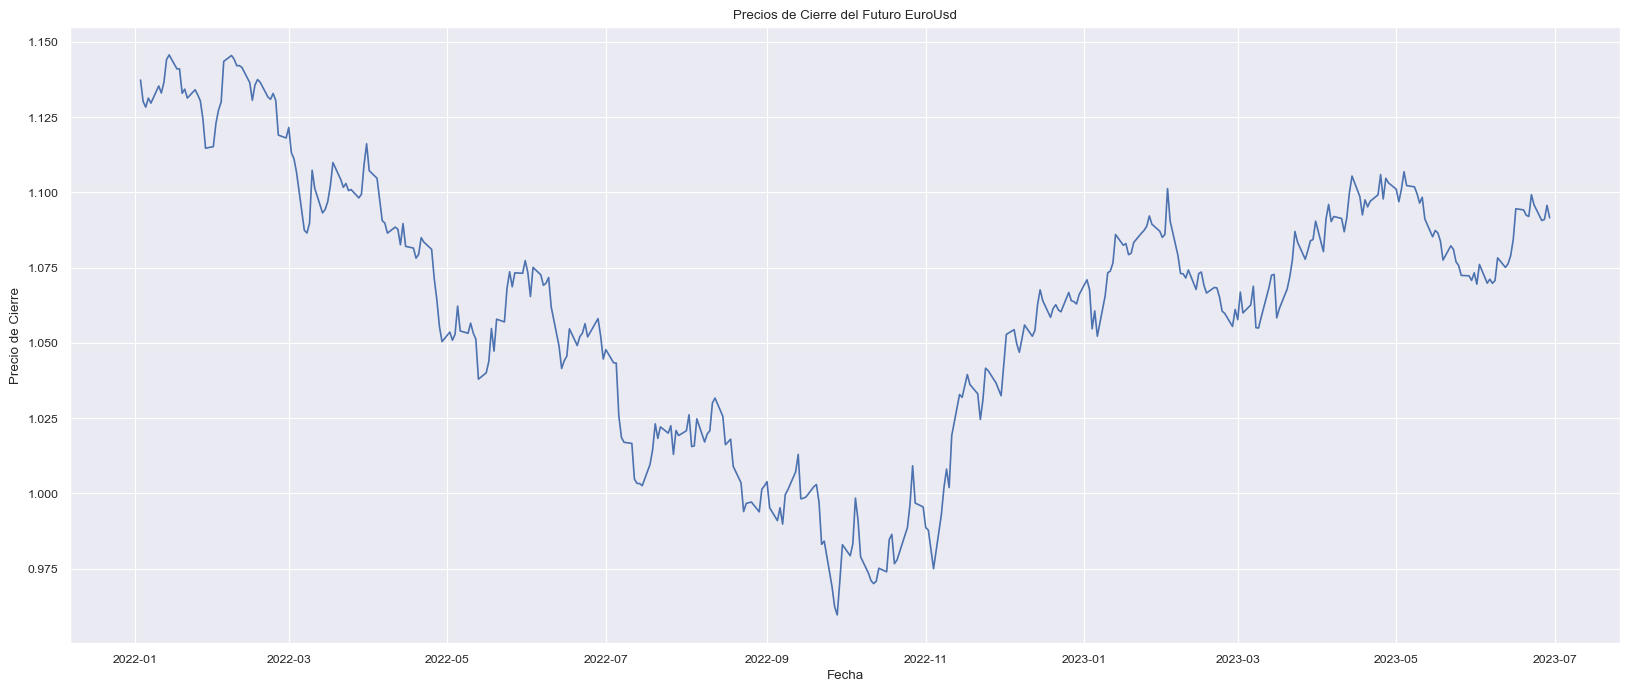

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(datos_historicos.index, datos_historicos['Close'])
plt.title('Precios de Cierre del Futuro EuroUsd')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()

**Tendencia general:** 
- El gráfico muestra una clara tendencia bajista durante la mayor parte del período analizado. Esto significa que el euro se ha depreciado frente al dólar estadounidense. Los inversores estaban dispuestos a pagar menos dólares por cada euro.

**Volatilidad:** 
- A pesar de la tendencia general bajista, el precio ha experimentado períodos de volatilidad, con fluctuaciones significativas en ambos sentidos. Esto sugiere que el mercado ha sido sensible a eventos económicos y políticos que han afectado la relación entre el euro y el dólar.

El gráfico muestra una tendencia bajista general en el precio del futuro del euro/dólar, con períodos de volatilidad.

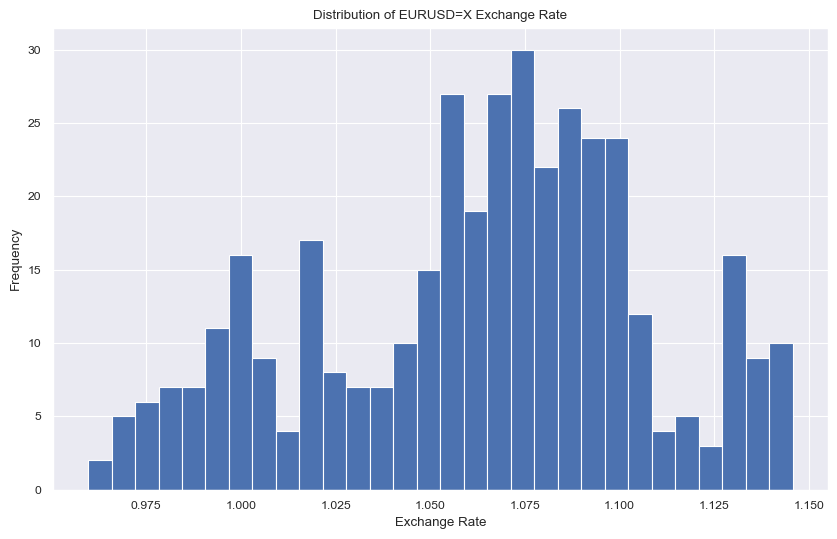

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(datos_historicos['Close'], bins=30)
plt.title('Distribution of EURUSD=X Exchange Rate')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

**Tendencia general:**
- Bajista. El precio del euro frente al dólar ha ido disminuyendo a lo largo del período analizado, comenzando en 1,13 y llegando a 1,05 en marzo de 2023.

**Niveles de soporte y resistencia:**

- Soporte: Se identifican niveles de soporte en 1,04, 1,05 y 1,06. Estos niveles han actuado como "piso" en varias ocasiones, evitando que el precio caiga aún más.
- Resistencia: Se observan niveles de resistencia en 1,08 y 1,10. Estos niveles han frenado el ascenso del precio en algunos momentos, actuando como "techo".

**Conclusión:**

El gráfico muestra que el euro se ha debilitado frente al dólar durante el período analizado. A pesar de algunos intentos de recuperación, la tendencia bajista ha persistido, encontrando soporte en niveles clave. Los niveles de resistencia identificados podrían ser objetivos a tener en cuenta si el precio intenta recuperarse en el futuro. Es importante seguir de cerca la evolución del precio y los factores macroeconómicos que puedan influir en el tipo de cambio.

<Figure size 1000x600 with 0 Axes>

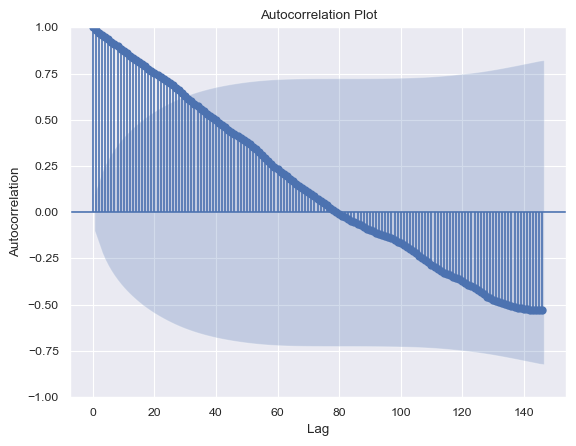

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(datos_historicos['Close'], lags=146)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


**Autocorrelación positiva en los primeros retrasos:** Las primeras barras del correlograma son positivas y estadísticamente significativas (asumiendo que superan las líneas azules de los intervalos de confianza). Esto indica que existe una cierta persistencia o inercia en los movimientos del precio del futuro del euro/dólar a corto plazo. Es decir, si el precio sube en un período, es probable que siga subiendo en los períodos inmediatamente siguientes, y viceversa.

**Disminución rápida de la autocorrelación:** A medida que aumenta el número de retrasos, la autocorrelación disminuye rápidamente y se vuelve no significativa. Esto sugiere que la relación entre los valores actuales y pasados del precio se debilita a medida que aumenta el horizonte temporal. En otras palabras, los movimientos del precio a largo plazo son menos predecibles a partir de los movimientos a corto plazo.

**Limitaciones de los modelos autorregresivos:** La baja autocorrelación en los retrasos más largos sugiere que los modelos autorregresivos simples (que utilizan valores pasados para predecir valores futuros) podrían no ser muy efectivos para predecir el precio del futuro del euro/dólar a largo plazo.

In [7]:
fig = go.Figure(data=[go.Candlestick(x = datos_historicos.index,
                                     open = datos_historicos['Open'], 
                                     high = datos_historicos['High'],
                                     low = datos_historicos['Low'], 
                                     close = datos_historicos['Close'])
                     ])
fig.update_layout(
    title="Euro Dolar",
    xaxis_title="Day",
    yaxis_title="Euro Dolar",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig

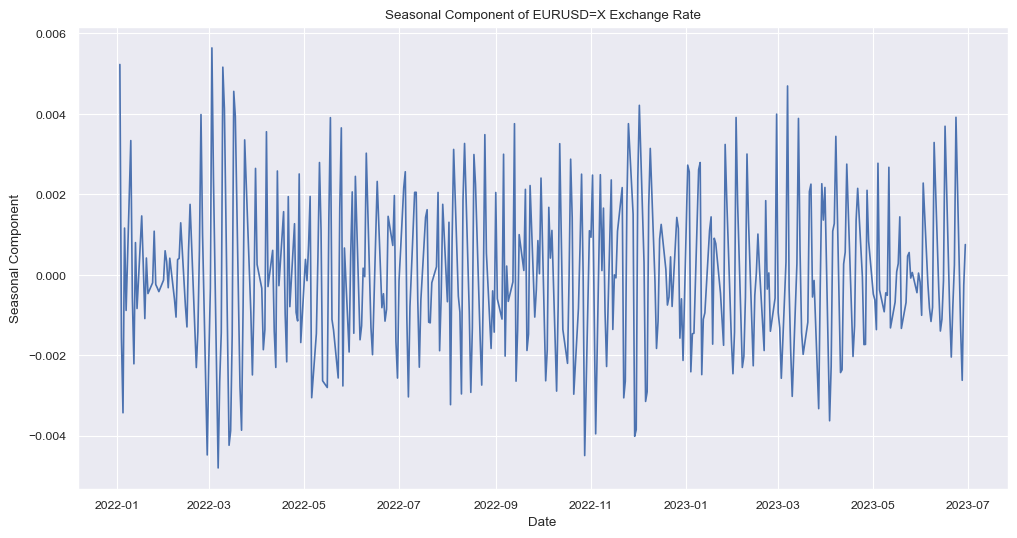

In [17]:
from statsmodels.tsa.seasonal import STL

stl = STL(datos_historicos['Close'])
result = stl.fit()
seasonal = result.seasonal

plt.figure(figsize=(12, 6))
plt.plot(datos_historicos.index, seasonal)
plt.title('Seasonal Component of EURUSD=X Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()


**Tendencia:**
- La línea azul representa la tendencia general de la serie temporal a lo largo del tiempo. En este caso, observamos una tendencia ligeramente creciente, lo que indica que los valores de la serie tienden a aumentar a medida que avanza el tiempo. Es importante destacar que esta tendencia no es perfectamente lineal, sino que presenta algunas fluctuaciones a lo largo del período analizado.

**Estacionalidad:**
- La línea roja representa el componente estacional, que captura los patrones repetitivos de la serie en intervalos regulares de tiempo. En este caso, se observa un patrón estacional claro, con picos y valles que se repiten de manera consistente. Esto sugiere que existe un factor estacional que influye en los valores de la serie, como podría ser la época del año, el día de la semana, etc.

**Residuos:** 
- La línea gris representa los residuos, que son la parte de la serie que no se explica por la tendencia ni por la estacionalidad. En otras palabras, son las fluctuaciones aleatorias o los eventos inesperados que afectan a la serie. En este caso, los residuos parecen ser relativamente pequeños y aleatorios, lo que indica que la tendencia y la estacionalidad capturan la mayor parte de la variabilidad de la serie.

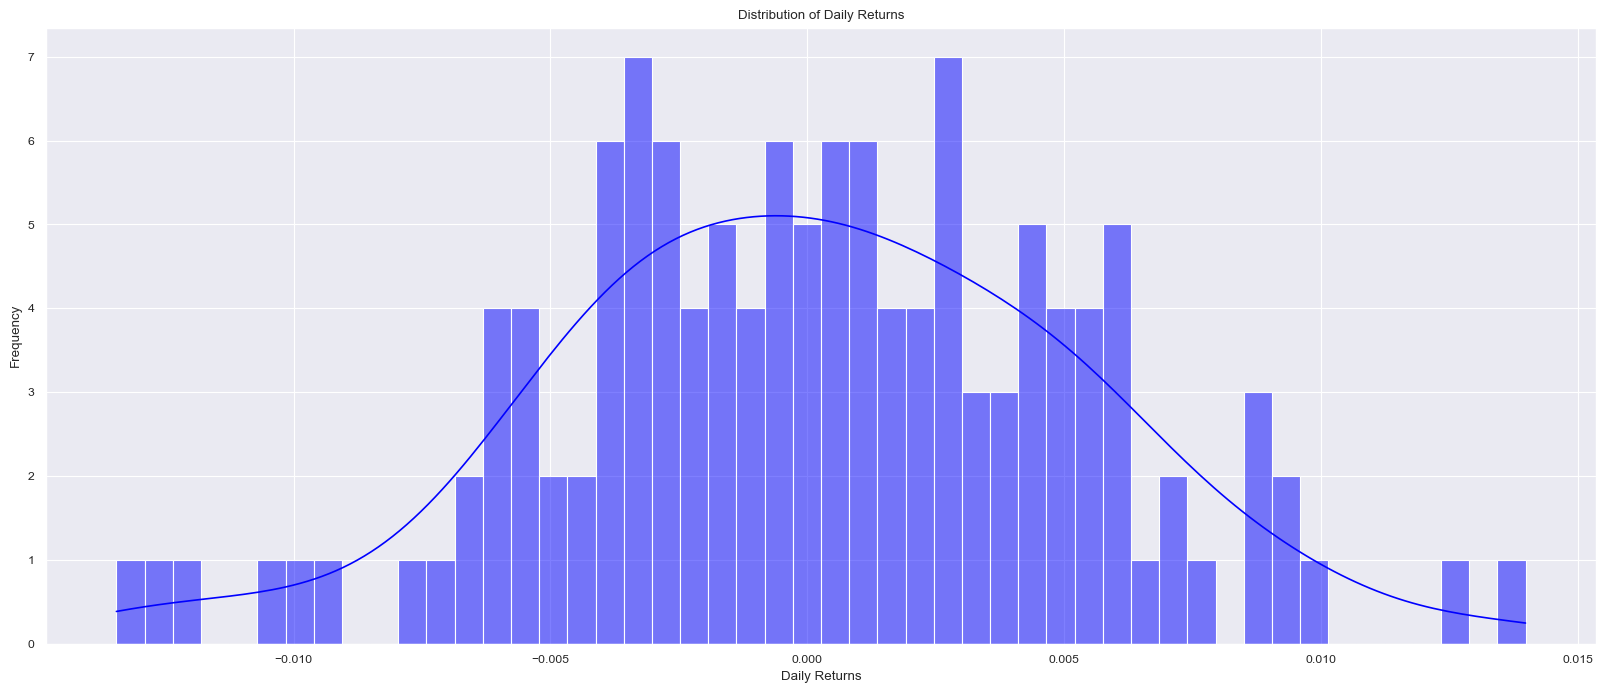

In [41]:
plt.figure(figsize=(20, 8))
sns.histplot(datos_historicos['Retornos'], kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

**Distribución:**

- La distribución de los rendimientos diarios se asemeja a una distribución normal, aunque con algunas desviaciones. La mayoría de los rendimientos se concentran alrededor de la media, que parece estar ligeramente por encima de cero, lo que sugiere un rendimiento promedio positivo durante el período analizado. Sin embargo, la distribución muestra una ligera asimetría negativa (cola izquierda más larga), lo que indica que hay una mayor probabilidad de rendimientos negativos extremos en comparación con los positivos extremos.

**Volatilidad:**

- La dispersión de los rendimientos alrededor de la media indica la volatilidad del activo. En este caso, la volatilidad parece moderada, ya que la mayoría de los rendimientos se encuentran dentro de un rango relativamente estrecho. Sin embargo, la presencia de algunos valores atípicos (outliers) sugiere que el activo puede experimentar movimientos de precios más bruscos en ocasiones.

**Implicaciones para la inversión:**

- Rendimiento esperado: La media ligeramente positiva sugiere que los inversores pueden esperar un rendimiento positivo en promedio, aunque no se puede garantizar un rendimiento específico en un día determinado.
- Riesgo: La volatilidad moderada y la asimetría negativa indican que el activo conlleva un cierto nivel de riesgo. Los inversores deben estar preparados para posibles fluctuaciones en el valor de su inversión y considerar su tolerancia al riesgo antes de invertir en este activo.
- Diversificación: Debido a la volatilidad y el riesgo asociados con este activo, sería prudente para los inversores diversificar su cartera, incluyendo otros activos con diferentes perfiles de riesgo y rendimiento.

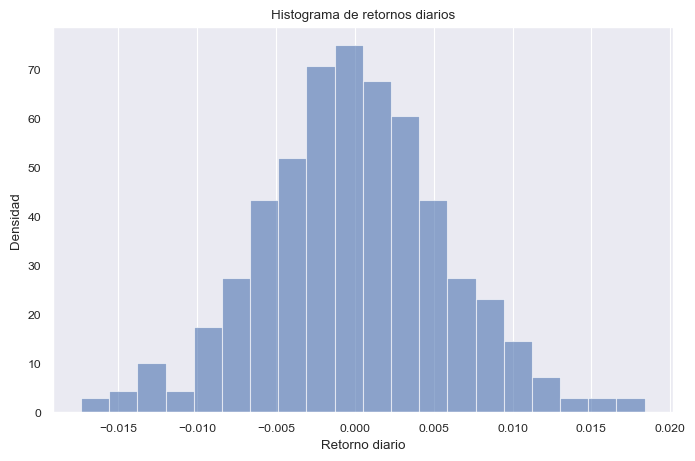

In [7]:
# Histograma de retornos
daily_returns = datos_historicos['Close'].pct_change()
plt.figure(figsize=(8, 5))
plt.hist(daily_returns, bins=20, density=True, alpha=0.6)
plt.title('Histograma de retornos diarios')
plt.xlabel('Retorno diario')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

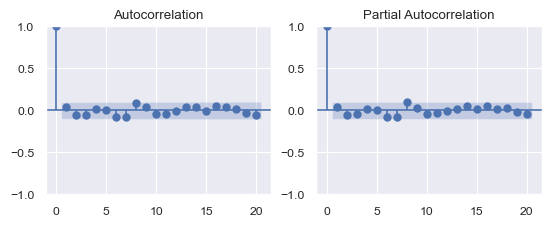

In [10]:
if abs(daily_returns.skew()) > 0.5:
    daily_returns_transformed, lambda_value = boxcox(daily_returns.dropna() + 1)
    plt.subplot(2, 2, 2)
    plt.hist(daily_returns_transformed, bins=20, density=True, alpha=0.6)
    plt.title(f'Histograma de retornos transformados (Box-Cox, lambda={lambda_value:.2f})')
    plt.xlabel('Retorno transformado')
    plt.ylabel('Densidad')
    plt.grid(axis='y')

# Autocorrelación y autocorrelación parcial
plt.subplot(2, 2, 3)
plot_acf(daily_returns.dropna(), lags=20, ax=plt.gca())
plt.subplot(2, 2, 4)
plot_pacf(daily_returns.dropna(), lags=20, ax=plt.gca())
plt.show()

**Función de Autocorrelación (ACF):**

- Retraso 0: La autocorrelación es siempre 1 en el retraso 0, ya que un valor siempre está perfectamente correlacionado consigo mismo.
- Retrasos Posteriores: Los valores de autocorrelación en los retrasos posteriores son cercanos a cero y se mantienen dentro del intervalo de confianza (la banda azul sombreada). 

Esto sugiere que no existe una correlación lineal significativa entre los valores de la serie temporal y sus valores pasados a partir del retraso 1. En otras palabras, el pasado de la serie no es útil para predecir su futuro de manera lineal.

**Función de Autocorrelación Parcial (PACF):**

- Retraso 0: Similar a la ACF, la autocorrelación parcial es 1 en el retraso 0.
- Retraso 1: Se observa un pico significativo en el retraso 1, lo que indica que el valor de la serie en un momento dado está significativamente correlacionado con el valor del período anterior, después de eliminar el efecto de los valores intermedios.
- Retrasos Posteriores: Los valores de autocorrelación parcial caen dentro del intervalo de confianza a partir del retraso 2. Esto sugiere que, después de controlar por el retraso 1, no hay correlaciones parciales significativas con retrasos mayores.

**Implicaciones para el un modelaje:**

El patrón observado en la ACF y PACF (un pico significativo en el retraso 1 de la PACF y ningún otro pico significativo) es característico de un proceso autorregresivo de orden 1 (AR(1)). Esto significa que un modelo adecuado para esta serie temporal podría ser aquel en el que el valor actual depende linealmente del valor del período anterior, más un término de error aleatorio.

In [16]:
# Pruebas estadísticas
print("\nPruebas estadísticas:")
# Prueba de normalidad (Shapiro-Wilk, D'Agostino-Pearson, Jarque-Bera)
stat_shapiro, p_shapiro = shapiro(daily_returns.dropna())
stat_normaltest, p_normaltest = normaltest(daily_returns.dropna())
stat_jarque_bera, p_jarque_bera = jarque_bera(daily_returns.dropna())
print(f'Prueba de Shapiro-Wilk: Estadística={stat_shapiro:.3f}, p-valor={p_shapiro:.3f}')
print(f'Prueba de D\'Agostino-Pearson: Estadística={stat_normaltest:.3f}, p-valor={p_normaltest:.3f}')
print(f'Prueba de Jarque-Bera: Estadística={stat_jarque_bera:.3f}, p-valor={p_jarque_bera:.3f}')


Pruebas estadísticas:
Prueba de Shapiro-Wilk: Estadística=0.996, p-valor=0.533
Prueba de D'Agostino-Pearson: Estadística=2.391, p-valor=0.303
Prueba de Jarque-Bera: Estadística=2.360, p-valor=0.307


En conjunto, los resultados de las tres pruebas sugieren que no hay evidencia estadística significativa para afirmar que los datos no provienen de una distribución normal. Esto significa que, según estas pruebas, la suposición de normalidad podría ser razonable para los datos analizados.

In [11]:
# Prueba t de Student (hipótesis nula: media de retornos = 0)
stat_t, p_t = ttest_1samp(daily_returns.dropna(), 0)
print(f'Prueba t de Student: Estadística={stat_t:.3f}, p-valor={p_t:.3f}')

# Prueba de Dickey-Fuller Aumentada (hipótesis nula: serie no estacionaria)
result = adfuller(datos_historicos['Close'])
print('\nPrueba de Dickey-Fuller Aumentada (Close):')
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')

Prueba t de Student: Estadística=-0.300, p-valor=0.764

Prueba de Dickey-Fuller Aumentada (Close):
ADF Statistic: -1.837
p-value: 0.362


**Prueba t de Student (hipótesis nula: media de retornos = 0):**

- Estadístico: -0.300
- Valor p: 0.764

Esta prueba evalúa si la media de los retornos diarios es estadísticamente diferente de cero. El valor p de 0.764, muy superior al nivel de significancia típico de 0.05, indica que no hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no podemos concluir que los retornos diarios del activo sean significativamente diferentes de cero en promedio. Esto sugiere que, en el período analizado, el activo no generó ganancias ni pérdidas promedio estadísticamente significativas.

**Prueba de Dickey-Fuller Aumentada (hipótesis nula: serie no estacionaria - precios de cierre):**

- Estadístico ADF: -1.837
- Valor p: 0.362

Esta prueba examina si la serie de precios de cierre ("Close") es estacionaria, es decir, si sus propiedades estadísticas (media, varianza) se mantienen constantes a lo largo del tiempo. El valor p de 0.362, superior al nivel de significancia de 0.05, indica que no hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no podemos afirmar con certeza que la serie de precios de cierre sea estacionaria. Esto sugiere que los precios podrían presentar tendencias o patrones que cambian con el tiempo, lo cual es relevante para su modelado y análisis.

**Rendimiento del activo:**
- En el período analizado, el activo no mostró un rendimiento promedio diario estadísticamente diferente de cero. Esto no implica necesariamente que el activo sea una mala inversión, ya que podrían existir otros factores a considerar, como la volatilidad o el riesgo asociado.

**Estacionariedad de los precios:** 
- Los precios de cierre del activo no presentan evidencia suficiente de estacionariedad. Esto podría indicar la presencia de tendencias o patrones cambiantes en los precios, lo que dificulta su predicción y requiere modelos más sofisticados para su análisis.